This model was built to cluster football players based on their SCA (Shot Creating Actions). <br>
My goal is to cluster them based on standardized data. <br>
The dataset from fbref.com containes all players from 5 big European Ligues for 2020-2021 season.

In [207]:
# Importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [208]:
# Setting up table scraper
url = 'https://fbref.com/en/comps/Big5/2020-2021/gca/players/2020-2021-Big-5-European-Leagues-Stats'
table_number = 1
#Changing Fbref's HTML so all tables are redable by bs4
html_content = requests.get(url).text.replace('<!--', '').replace('-->', '')
dataframe = pd.read_html(html_content)
#Loading DF
data = dataframe[table_number]
column_names = ["_".join(col) for col in data.columns.values]
column_names = [col.replace("Unnamed: ","").replace('_level_0','') for col in column_names]
data.columns = column_names

In [209]:
data.head()

,0_Rk,1_Player,2_Nation,3_Pos,4_Squad,5_Comp,6_Age,7_Born,8_90s,SCA_SCA,...,SCA Types_Def,GCA_GCA,GCA_GCA90,GCA Types_PassLive,GCA Types_PassDead,GCA Types_Drib,GCA Types_Sh,GCA Types_Fld,GCA Types_Def,25_Matches
0,1,Ismael Aaneba,fr FRA,"FW,DF",Strasbourg,fr Ligue 1,21,1999,0.1,0,...,0,0,0.00,0,0,0,0,0,0,Matches
1,2,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29,1990,19.7,26,...,0,3,0.15,2,1,0,0,0,0,Matches
2,3,Issah Abbas,gh GHA,"DF,FW",Mainz 05,de Bundesliga,21,1998,0.2,0,...,0,0,0.00,0,0,0,0,0,0,Matches
3,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32,1987,32.1,11,...,0,0,0.00,0,0,0,0,0,0,Matches
4,5,Sabit Abdulai,gh GHA,MF,Getafe,es La Liga,21,1999,0.7,0,...,0,0,0.00,0,0,0,0,0,0,Matches


In [210]:
# Data cleaning
cols_to_drop = ['0_Rk','25_Matches','GCA_GCA', 'GCA_GCA90', 'GCA Types_PassLive',
       'GCA Types_PassDead', 'GCA Types_Drib', 'GCA Types_Sh', 'GCA Types_Fld',
       'GCA Types_Def']
for i in cols_to_drop:
    del data[i]
cols_to_float = ['6_Age', '7_Born','8_90s', 'SCA_SCA', 'SCA_SCA90', 'SCA Types_PassLive',
       'SCA Types_PassDead', 'SCA Types_Drib', 'SCA Types_Sh', 'SCA Types_Fld',
       'SCA Types_Def']
for i in cols_to_float:
    data[i] = pd.to_numeric(data[i],errors = 'coerce')
data = data[data['1_Player'] != 'Player']
col_names = [col.replace('SCA Types_','') for col in data.columns]
col_names = [col.replace('SCA_','') for col in col_names]
data.columns = col_names

In [211]:
data

,1_Player,2_Nation,3_Pos,4_Squad,5_Comp,6_Age,7_Born,8_90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def
0,Ismael Aaneba,fr FRA,"FW,DF",Strasbourg,fr Ligue 1,21.0,1999.0,0.1,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,19.7,26.0,1.32,22.0,3.0,1.0,0.0,0.0,0.0
2,Issah Abbas,gh GHA,"DF,FW",Mainz 05,de Bundesliga,21.0,1998.0,0.2,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,32.1,11.0,0.34,10.0,0.0,0.0,1.0,0.0,0.0
4,Sabit Abdulai,gh GHA,MF,Getafe,es La Liga,21.0,1999.0,0.7,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,Steven Zuber,ch SUI,"DF,MF",Eint Frankfurt,de Bundesliga,28.0,1991.0,6.5,22.0,3.38,19.0,0.0,1.0,0.0,1.0,1.0
2930,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,21.0,1999.0,20.9,25.0,1.20,19.0,0.0,1.0,1.0,4.0,0.0
2931,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,21.0,1998.0,9.6,42.0,4.36,34.0,4.0,1.0,1.0,2.0,0.0
2932,Martin Ødegaard,no NOR,"MF,FW",Real Madrid,es La Liga,21.0,1998.0,2.6,6.0,2.31,5.0,1.0,0.0,0.0,0.0,0.0


In [212]:
# Making list with new column names
cols_list = ['PassLive', 'PassDead', 'Drib', 'Sh', 'Fld', 'Def']
new_cols_list = [x+'_Ratio' for x in cols_list]
new_cols_list

['PassLive_Ratio',
 'PassDead_Ratio',
 'Drib_Ratio',
 'Sh_Ratio',
 'Fld_Ratio',
 'Def_Ratio']

In [213]:
# Standardizing data 
for num, col in enumerate(new_cols_list):
    data[col] = data[cols_list[num]] / data['SCA']
data.head()

,1_Player,2_Nation,3_Pos,4_Squad,5_Comp,6_Age,7_Born,8_90s,SCA,SCA90,...,Drib,Sh,Fld,Def,PassLive_Ratio,PassDead_Ratio,Drib_Ratio,Sh_Ratio,Fld_Ratio,Def_Ratio
0,Ismael Aaneba,fr FRA,"FW,DF",Strasbourg,fr Ligue 1,21.0,1999.0,0.1,0.0,0.00,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,19.7,26.0,1.32,...,1.0,0.0,0.0,0.0,0.846154,0.115385,0.038462,0.000000,0.0,0.0
2,Issah Abbas,gh GHA,"DF,FW",Mainz 05,de Bundesliga,21.0,1998.0,0.2,0.0,0.00,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,32.1,11.0,0.34,...,0.0,1.0,0.0,0.0,0.909091,0.000000,0.000000,0.090909,0.0,0.0
4,Sabit Abdulai,gh GHA,MF,Getafe,es La Liga,21.0,1999.0,0.7,0.0,0.00,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
# Sampling out only forwards and midfielders, as well as players with more than 5 games and SCA over 15
positions = ['FW,DF', 'MF', 'FW', 'FW,MF', 'MF,FW']
data = data[data['3_Pos'].isin(positions)]
data = data[(data['8_90s'] > 5) & (data['SCA'] > 15)]

In [215]:
data

,1_Player,2_Nation,3_Pos,4_Squad,5_Comp,6_Age,7_Born,8_90s,SCA,SCA90,...,Drib,Sh,Fld,Def,PassLive_Ratio,PassDead_Ratio,Drib_Ratio,Sh_Ratio,Fld_Ratio,Def_Ratio
5,Mehdi Abeid,dz ALG,MF,Nantes,fr Ligue 1,27.0,1992.0,14.7,28.0,1.91,...,2.0,0.0,2.0,2.0,0.642857,0.142857,0.071429,0.000000,0.071429,0.071429
6,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,27.0,1993.0,32.9,56.0,1.70,...,1.0,5.0,4.0,5.0,0.714286,0.017857,0.017857,0.089286,0.071429,0.089286
11,Tammy Abraham,eng ENG,FW,Chelsea,eng Premier League,22.0,1997.0,11.6,18.0,1.56,...,1.0,3.0,3.0,0.0,0.611111,0.000000,0.055556,0.166667,0.166667,0.000000
17,Che Adams,sct SCO,FW,Southampton,eng Premier League,24.0,1996.0,29.6,66.0,2.23,...,1.0,6.0,8.0,3.0,0.727273,0.000000,0.015152,0.090909,0.121212,0.045455
19,Sargis Adamyan,am ARM,"FW,MF",Hoffenheim,de Bundesliga,27.0,1993.0,5.3,22.0,4.13,...,1.0,2.0,3.0,0.0,0.681818,0.045455,0.045455,0.090909,0.136364,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,Piotr Zieliński,pl POL,MF,Napoli,it Serie A,26.0,1994.0,28.0,109.0,3.89,...,7.0,7.0,6.0,2.0,0.678899,0.119266,0.064220,0.064220,0.055046,0.018349
2924,Hakim Ziyech,ma MAR,"FW,MF",Chelsea,eng Premier League,27.0,1993.0,13.0,70.0,5.38,...,3.0,6.0,1.0,0.0,0.757143,0.100000,0.042857,0.085714,0.014286,0.000000
2930,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,21.0,1999.0,20.9,25.0,1.20,...,1.0,1.0,4.0,0.0,0.760000,0.000000,0.040000,0.040000,0.160000,0.000000
2931,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,21.0,1998.0,9.6,42.0,4.36,...,1.0,1.0,2.0,0.0,0.809524,0.095238,0.023810,0.023810,0.047619,0.000000


D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


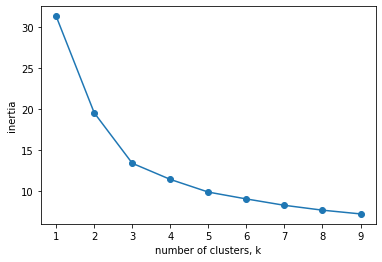

In [216]:
# Choosing number of clusters
from sklearn.cluster import KMeans
samples = data[new_cols_list]
ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)    
    model.fit(samples)    
    inertias.append(model.inertia_)    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

As the plot above suggests, I will use 3 clusters for this dataset.

In [217]:
model = KMeans(n_clusters=3)
model.fit(samples)

clusters = model.predict(samples)
data['Cluster'] = clusters
data['Cluster'].head()

5     2
6     0
11    2
17    0
19    2
Name: Cluster, dtype: int32

Now it is time to check how the clusters were made. <br>
I will start with writing a function that plots clusters, and begin looking for patterns.

In [218]:
def plot_clusters(xAxis, yAxis):
    plt.scatter(data[data['Cluster']==0][xAxis], data[data['Cluster']==0][yAxis], s=40, c='red', label ='Cluster 1')
    plt.scatter(data[data['Cluster']==1][xAxis], data[data['Cluster']==1][yAxis], s=40, c='blue', label ='Cluster 2')
    plt.scatter(data[data['Cluster']==2][xAxis], data[data['Cluster']==2][yAxis], s=40, c='green', label ='Cluster 3')
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)    
    plt.legend() 

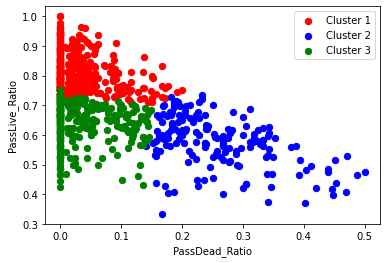

In [219]:
plot_clusters('PassDead_Ratio', 'PassLive_Ratio')

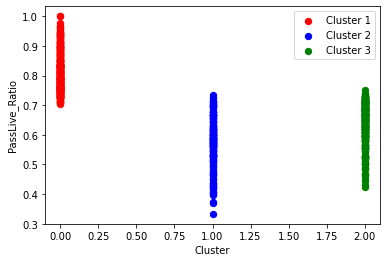

In [220]:
plot_clusters('Cluster', 'PassLive_Ratio')

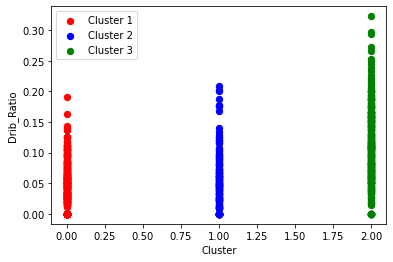

In [221]:
plot_clusters('Cluster', 'Drib_Ratio')

From these scatterplots it is easy to conclude, how players were clustered: <br>
Cluster 2 containes players that gain most of their SCA from set pieces, <br>
Cluster 1 containes players that accumulate SCA from live passes, <br>
and players in Cluster 3 gain ther SCA mostly from dribbles.